STAGE 1: Problem Scoping 
4Ws Framework
WHO (Stakeholders)
●	Plant Managers (Decision-makers)
●	Maintenance Engineers (Action takers)
●	Operations & Reliability Teams
●	Manufacturing Leadership
WHAT (Problem)
●	Unexpected machine failures with no early warning system
●	Maintenance actions triggered only after breakdowns or fixed intervals
●	Lack of machine risk prioritization
WHERE (Operational Context)
●	Manufacturing shop floors
●	Industrial machines equipped with sensors (temperature, vibration, pressure, load)
●	Maintenance logs and operational records
WHY (Need for AI)
●	Failure patterns are complex, multivariate, and non-linear
●	Manual monitoring does not scale across machines
●	Rule-based thresholds fail to capture early degradation trends
AI Objective
To identify machines at high risk of failure by analyzing historical operational behavior, sensor trends, and maintenance patterns, enabling proactive maintenance planning.


In [2]:
# Stage 2 Data Requirement and Identification


import numpy as np
import pandas as pd

np.random.seed(42)

n = 1000


data = {
    "Machine_ID": [f"M_{i+1:04d}" for i in range(n)],
    "Operating_Hours": np.random.randint(6, 24, n),
    "Load_Percentage": np.random.randint(50, 100, n),
    "Temperature": np.random.normal(75, 10, n),
    "Vibration": np.random.normal(3.0, 1.0, n),
    "Pressure": np.random.normal(30, 5, n),
    "Power_Consumption": np.random.normal(400, 50, n),
    "Last_Maintenance_Days": np.random.randint(1, 180, n),
    "Breakdown_Count": np.random.poisson(1.5, n),
    "Ambient_Temperature": np.random.randint(20, 45, n),
    "Humidity": np.random.randint(30, 90, n)
}

df = pd.DataFrame(data)




In [3]:
failure_score = (
    (df["Temperature"] > 85).astype(int) +
    (df["Vibration"] > 4).astype(int) +
    (df["Operating_Hours"] > 18).astype(int) +
    (df["Last_Maintenance_Days"] > 90).astype(int) +
    (df["Breakdown_Count"] > 2).astype(int)
)

df["Failure_Flag"] = (failure_score >= 3).astype(int)


df.to_csv("synthetic_machine_data.csv", index=False)
print("Synthetic dataset created successfully!")

Synthetic dataset created successfully!


In [4]:
# Loading synthetic dataset
df = pd.read_csv("synthetic_machine_data.csv")


print(df.head())
print(df.info())
print(df.describe())


print(df["Failure_Flag"].value_counts())


  Machine_ID  Operating_Hours  Load_Percentage  Temperature  Vibration  \
0     M_0001               12               94    70.370509   2.759089   
1     M_0002               20               74    64.185804   1.454350   
2     M_0003               16               88    76.765113   3.562317   
3     M_0004               13               58    77.654038   3.417263   
4     M_0005               12               71    58.817892   4.137706   

    Pressure  Power_Consumption  Last_Maintenance_Days  Breakdown_Count  \
0  32.301279         396.180518                     37                2   
1  36.545722         392.624022                    134                3   
2  26.398855         384.481561                     65                0   
3  30.095474         369.942593                    134                2   
4  27.398089         413.259932                    178                1   

   Ambient_Temperature  Humidity  Failure_Flag  
0                   36        79             0  
1     

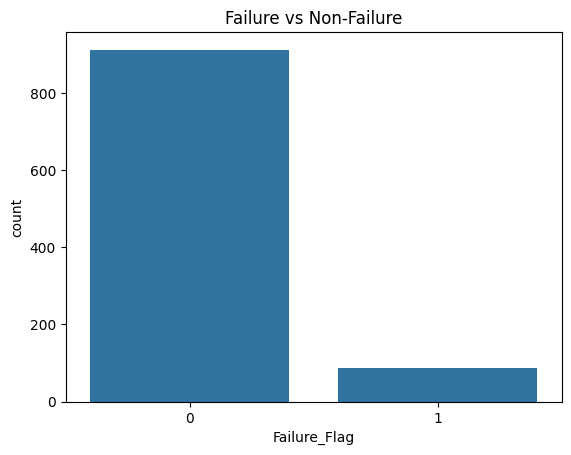

In [ ]:
# Failure vs Non-Failure
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Failure_Flag", data=df)
plt.title("Failure vs Non-Failure")
plt.show()



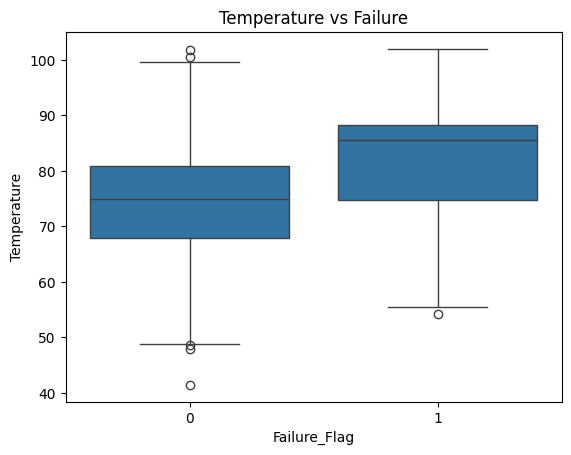

In [6]:
# Temprature vs Failure
sns.boxplot(x="Failure_Flag", y="Temperature", data=df)
plt.title("Temperature vs Failure")
plt.show()



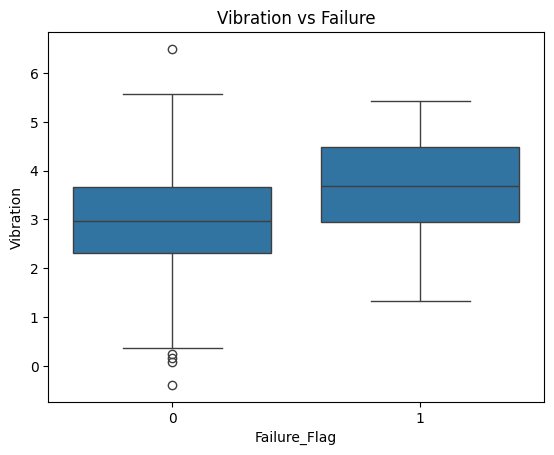

In [7]:
# Vibration vs Failure
sns.boxplot(x="Failure_Flag", y="Vibration", data=df)
plt.title("Vibration vs Failure")
plt.show()



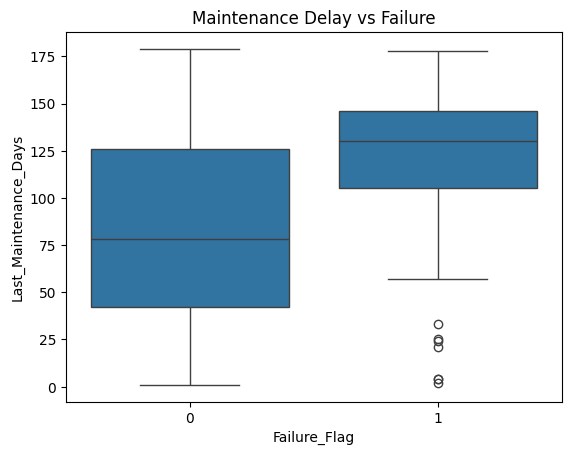

In [8]:
# Maintenance Delay vs Failure
sns.boxplot(x="Failure_Flag", y="Last_Maintenance_Days", data=df)
plt.title("Maintenance Delay vs Failure")
plt.show()



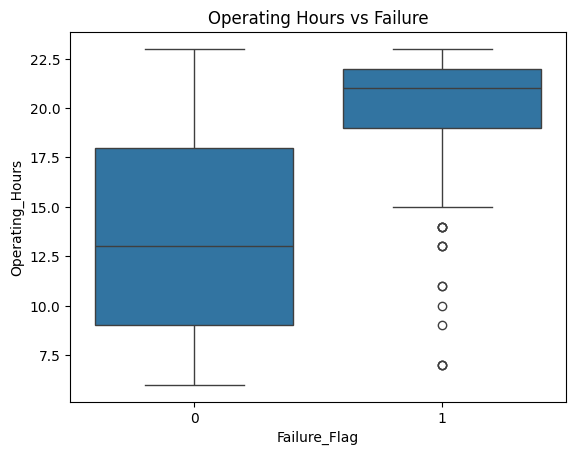

In [9]:
# Operating Hours vs Failure
sns.boxplot(x="Failure_Flag", y="Operating_Hours", data=df)
plt.title("Operating Hours vs Failure")
plt.show()



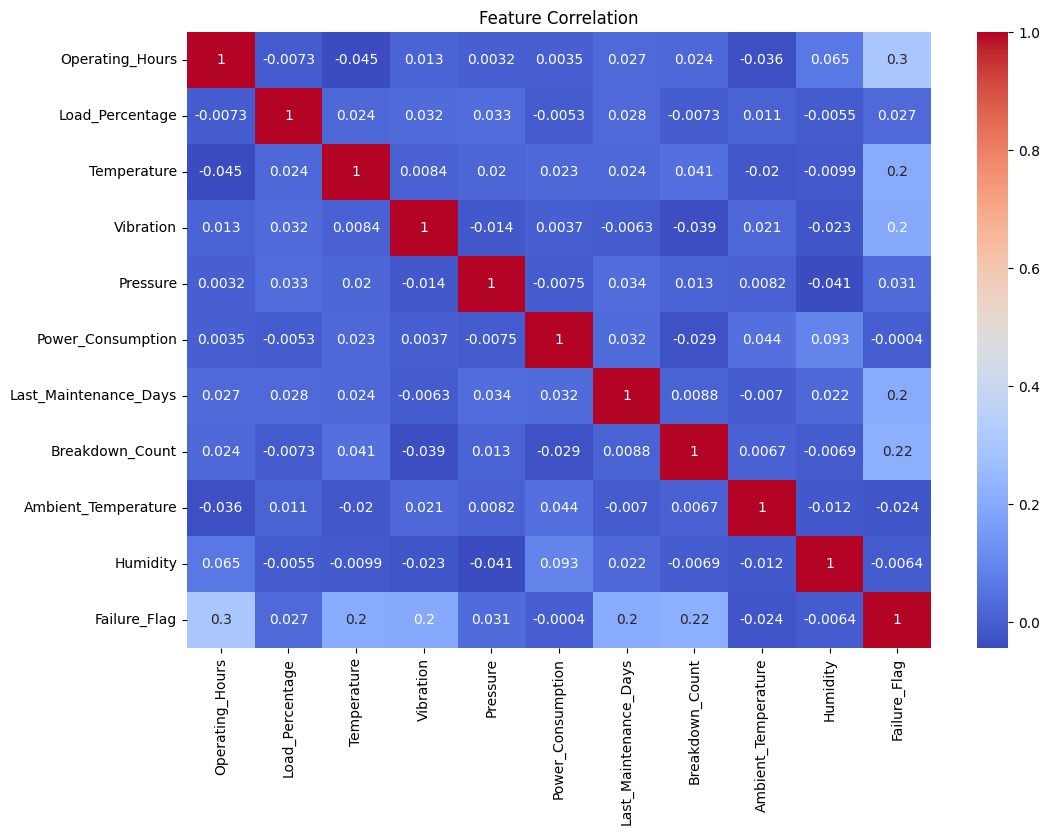

In [11]:
# Correlation heatmap
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()